# Principal components analysis (PCA)

## Team members:

* Project Manager - Assemgul 
* Technical writer - Danial
* Author of executable content - Miras
* Designer of interactive plots - Alikhan
* Designer of quizzes - Yerzhan

# Introduction
**Principal Component Analysis (PCA)** is a powerful technique that efficiently reduces dimensionality, consolidating data features to preserve vital information, particularly beneficial for complex, high-dimensional data analysis.

![PCA.png](images/PCA.png)

# Principal Component Analysis on practice

Let's consider example of Dimensionality Reduction and Data Visualization with PCA in real life.

![example.png](images/exampleOfUse.png)

Imagine having abundant data on river fish features. Applying PCA to dimensions like width and height unveils crucial components like overall size and body shape, simplifying the dataset and providing researchers with valuable insights into key factors shaping fish characteristics in the river.

# PCA Essentials

In the presence of a substantial set of variables, PCA discerns a limited number of linear combinations (components) that preserve most of the information inherent in the variables.
If we consider p variables $x_1$, ..., $x_p$ a PCA examination would detect components $Z_1$, $Z_2$,..., $Z_p$ that constitute linear combinations derived from the initial variables.


$$z_1 = \phi_{11} x_1 + \phi_{12} x_2 + \dots + \phi_{1p} x_p$$

$$z_2 = \phi_{21} x_1 + \phi_{22} x_2 + \dots + \phi_{2p} x_p$$

$$z_3 = \phi_{31} x_1 + \phi_{32} x_2 + \dots + \phi_{3p} x_p$$

$$\vdots$$

In [28]:
from jupyterquiz import display_quiz
import json
with open("images/question.json", "r") as file:
    questions=json.load(file)

In [29]:
display_quiz([questions[1]])

<IPython.core.display.Javascript object>

Ideally, we aim for the initial components in PCA to capture most information, enabling the discarding of the rest. PCA serves as a data reduction technique, with extremes where the number of "important" components equals the number of variables in fully independent situations, or a single component retains all information in perfectly correlated scenarios.
<br></br>
To simplify, let's assume that variables $x_1$, ..., $x_p$ are standardized to have a mean of 0 and a standard deviation of 1. Concerning the first component,

$$z_1 = \phi_{11} x_1 + \phi_{12} x_2 + \dots + \phi_{1p} x_p$$

We are required to identify the component loading vector ($\phi_{11}$, $\phi_{12}$, ..., $\phi_{1p}$) that exhibits the highest variance. It's essential to impose the constraint $\sum_{j_1}^{p} \phi_{j_1}^2 = 1$
 to prevent an increase in variance solely by magnifying the $\phi_{j1}$ values.

In a formal sense, our objective is to discover the loading vector that maximizes var ($z_1$) while adhering to the constraint $\sum_{j_1}^{p} \phi_{j_1}^2 = 1$. This is considered under the condition that $z_1$ has a mean of zero

$$\text{maximise } \text{var}(z_1) = \text{maximise } \frac{1}{n} \sum_{i=1}^{n} z_{ij}^2 = \text{maximise } \frac{1}{n} \sum_{i=1}^{n} \left(\sum_{j=1}^{n} \phi_{j1} x_{ij}\right)^2$$

Geometrically, $z_1$ represents the projection of vectors $x_1$, ..., $x_p$ onto a real line. We aim for this projection to have the direction that maximizes variance. In a simplified representation with only two variables, $x_1$ and $x_2$, the first component is the line where the projected points exhibit greater dispersion (variance). Points projected on the right side of the line display higher variance than those on the left side.

In [31]:
display_quiz([questions[0]])

<IPython.core.display.Javascript object>

# PCA on syntesized dataset

Import all libraries and create synthetic dataset with 3 features and linear relations

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=3, centers=3, random_state=42)
X[:5, :]

array([[ -2.93606642,   9.51573446,   5.79806549],
       [-10.33909615,   7.48854571,   1.16637132],
       [ -8.46103149,   8.9748739 ,   0.69546847],
       [ -1.92707483,   9.90203459,   5.53421117],
       [  2.20412341,  -7.68856408,  -5.82268608]])

Visualize the dataset in 3D Plot

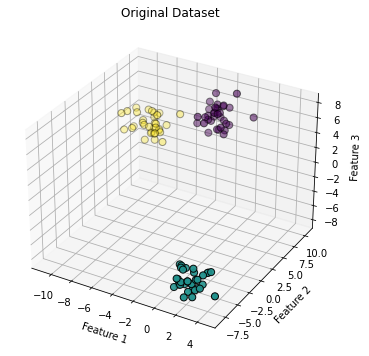

In [31]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title("Original Dataset")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

Perform PCA with 2 components

In [32]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

explained_variance = pca.explained_variance_
print(f"Explained Variance for each component: {explained_variance}")

explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio.sum()}")

Explained Variance for each component: [84.67011784  8.7091792 ]
Explained Variance Ratio: 0.9900992487003861


Visualize the result of PCA

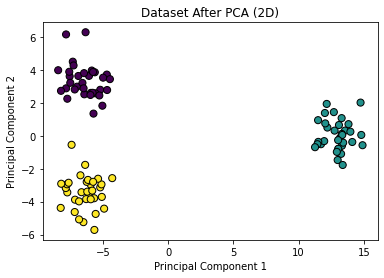

In [33]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title("Dataset After PCA (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# PCA Benefits

* **Dimensionality Reduction:** PCA efficiently reduces the number of variables, simplifying complex datasets while preserving essential information.
<br/><br/>
* **Data Visualization:** It facilitates the visualization of high-dimensional data in lower dimensions, aiding in interpretation and analysis.
<br/><br/>
* **Noise Reduction:** PCA identifies significant patterns, reducing noise and enhancing the signal-to-noise ratio, contributing to more robust analyses.

In [30]:
display_quiz([questions[6]])

<IPython.core.display.Javascript object>

# Examples

## Without PCA

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import pandas as pd
iris_data = pd.read_csv("datasets/Iris.csv",index_col='Id')
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [9]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

Perform KNN on the dataset, without using PCA

In [10]:
scaler = MinMaxScaler()

X=scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9714285714285714 %
Test score before PCA 0.9777777777777777 %


## With PCA

Now let's try to use PCA to reduce features from 4 to 3 and perform KNN

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

Let's visualize the dataset and show how it's complicated, even if it's only 4 features

In [12]:
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [13]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [14]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)
knn_pca = KNeighborsClassifier(7)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9619047619047619 %
Test score after PCA 0.9777777777777777 %


Even if the Train score decresead, Test score is not changed, with that, we get rid of 1 feature without any big loss in accuracy 

# Example of PCA limitations

Now let's try it on the dataset that will have bad performance after applying PCA on it, first we will try KNN without PCA and show accuracy score, and then we will apply PCA and after try KNN and show accuracy score

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply k-NN without PCA
knn_without_pca = KNeighborsClassifier(n_neighbors=5)
knn_without_pca.fit(X_train_scaled, y_train)
y_pred_without_pca = knn_without_pca.predict(X_test_scaled)
accuracy_without_pca = accuracy_score(y_test, y_pred_without_pca)
print(f'Accuracy without PCA: {accuracy_without_pca:.2f}')

# Apply PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Apply k-NN with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)
y_pred_with_pca = knn_with_pca.predict(X_test_pca)
accuracy_with_pca = accuracy_score(y_test, y_pred_with_pca)
print(f'Accuracy with PCA: {accuracy_with_pca:.2f}')


Accuracy without PCA: 0.95
Accuracy with PCA: 0.83


Here it's clear that we lose in accuracy, so it's not recommended to use PCA in datasets where accuracy matters

In [27]:
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Create a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_redundant=5, random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate the cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Create the base figure
fig = go.Figure()

# Set the initial y-axis range based on the maximum explained variance
initial_y_range = 1.1 * max(cumulative_variance)

# Add the initial traces
fig.add_trace(go.Scatter(x=list(range(1, len(cumulative_variance) + 1)), y=cumulative_variance,
                         mode='lines+markers', name='Explained Variance'))

# Layout configuration
fig.update_layout(title='Interactive Explained Variance Ratio with Changing Principal Components',
                  xaxis_title='Number of Principal Components',
                  yaxis_title='Cumulative Explained Variance Ratio',
                  yaxis=dict(range=[0, initial_y_range]))

# Add dynamic text displaying the explained variance
fig.update_layout(
    annotations=[
        dict(
            text=f'Explained Variance: {cumulative_variance[0]:.2f}',
            showarrow=False,
            x=1.05,
            y=0.9
        )
    ]
)

# Add a slider for selecting the number of principal components
fig.update_layout(sliders=[
    {
        'steps': [
            {
                'method': 'animate',
                'label': str(components),
                'args': [
                    [str(components)], 
                    {
                        'mode': 'immediate',
                        'frame': {'duration': 500, 'redraw': True},
                        'transition': {'duration': 300}
                    }
                ]
            }
            for components in range(1, len(cumulative_variance) + 1)
        ],
        'currentvalue': {'prefix': 'Principal Components: '}
    }
])

# Add frames for each possible number of principal components
fig.frames = [
    go.Frame(
        data=[
            go.Scatter(x=list(range(1, components + 1)), 
                       y=cumulative_variance[:components],
                       mode='lines+markers', name='Explained Variance')
        ],
        name=str(components)
    )
    for components in range(1, len(cumulative_variance) + 1)
]

# Add dynamic text in each frame displaying the explained variance
for components in range(1, len(cumulative_variance) + 1):
    fig.frames[components - 1]['layout'].update(
        annotations=[
            dict(
                text=f'Explained Variance: {cumulative_variance[components - 1]:.2f}',
                showarrow=False,
                x=1.05,
                y=0.9
            )
        ]
    )

# Show the figure
fig.show()
